In [10]:
Data Analysis Python Project-BLINKIT ANALYSIS

In [3]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import raw data
data=pd.read_csv(r'BlinkIT Grocery Data (1).csv')


In [4]:
# Sample data
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
data.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [6]:
#size of dataset
print("Size of datadata:",data.shape)

Size of datadata: (8523, 12)


In [7]:
#Columns info:
data.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [8]:
#Checking Datatypes
data.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

In [9]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
data['Item Fat Content']=data['Item Fat Content'].replace({'LF':'Low Fat',
                                                           'low fat':'Low Fat',
                                                           'reg':'Regular'})

In [11]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [12]:
data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Total Sales                     0
Rating                          0
dtype: int64

In [13]:
data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Total Sales                     0
Rating                          0
dtype: int64

In [14]:
data['Item Weight']=data['Item Weight'].fillna(data['Item Weight'].mean())

In [15]:
data.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Total Sales                  0
Rating                       0
dtype: int64

In [16]:
#KPI:-

total_sales=data['Total Sales'].sum()
print(f"Total Sales:{total_sales:.0f}")
Avg_sales=data['Total Sales'].mean()
print(f"Average Sales:{Avg_sales:.1f}")
no_of_items_sold=data['Total Sales'].count()
print(f"Total Items:{no_of_items_sold:,.0f}")
avg_ratings=data['Rating'].mean()
print(f"Average Ratings:{avg_ratings:.1f}")


Total Sales:1201681
Average Sales:141.0
Total Items:8,523
Average Ratings:4.0


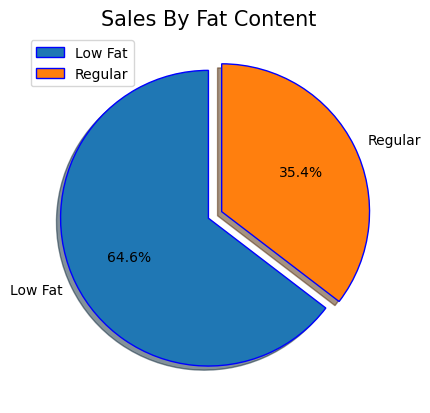

In [19]:
sales_by_fat=data.groupby('Item Fat Content')['Total Sales'].sum() 
y=['Low Fat','Regular']
ex=[0.0,0.1]
plt.title("Sales By Fat Content",fontsize=15)
plt.pie(sales_by_fat,
        labels=y,
        explode=ex,
        shadow=True,
        autopct="%0.1f%%",
        radius=1,
        wedgeprops={"edgecolor":"b"},
        startangle=90)
plt.legend()
plt.show()


In [20]:
sales_by_fat=data.groupby('Item Fat Content')['Total Sales'].sum() 
sales_by_fat


Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Total Sales, dtype: float64

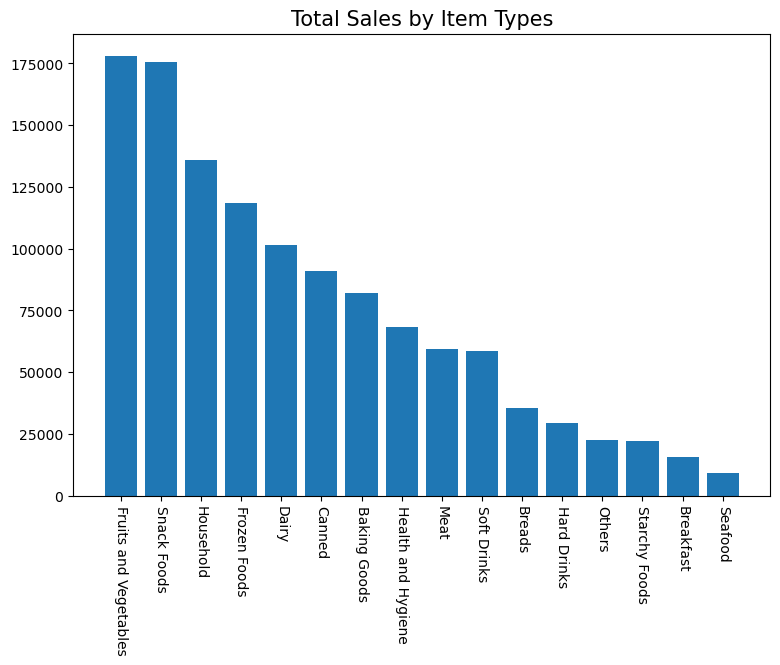

In [21]:
sales_by_type=data.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(9,6))
plt.xticks(rotation=-90)
plt.title("Total Sales by Item Types",fontsize=15)
plt.bar(sales_by_type.index,sales_by_type.values)
plt.show()

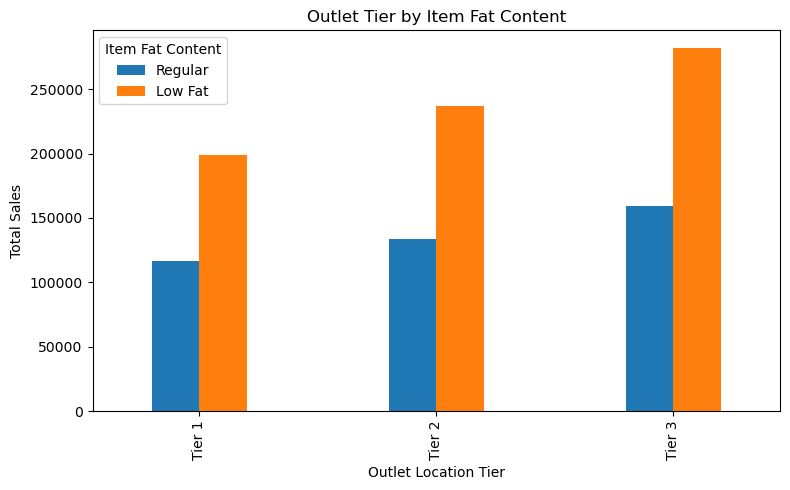

In [9]:
grouped=data.groupby(['Outlet Location Type','Item Fat Content'])['Total Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]
x=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content',width=0.4)
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

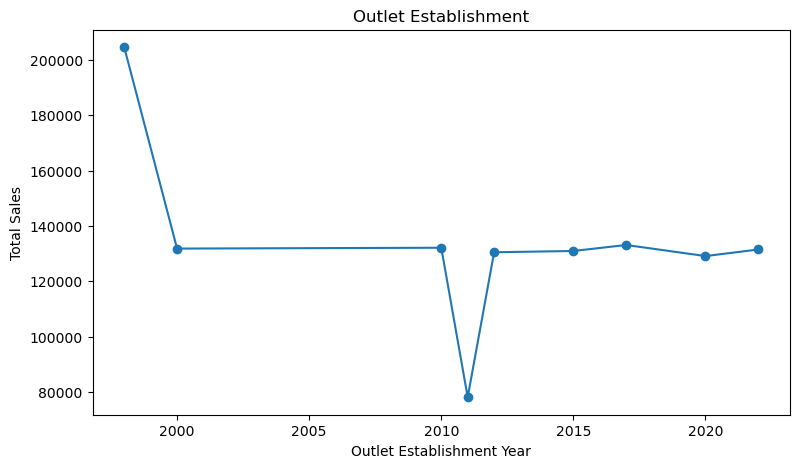

In [12]:
sales_by_year=data.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Outlet Establishment")
plt.show()

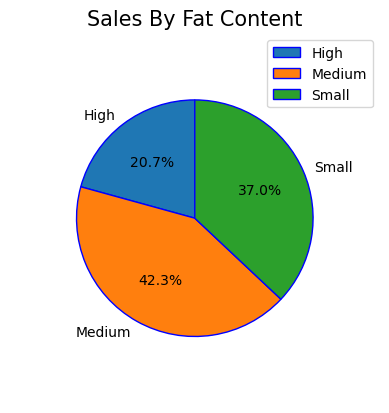

In [17]:
sales_by_fat=data.groupby('Outlet Size')['Total Sales'].sum() 
plt.title("Sales By Fat Content",fontsize=15)
plt.pie(sales_by_fat,
        labels=sales_by_fat.index,
        autopct="%0.1f%%",
        radius=0.8,
        wedgeprops={"edgecolor":"b"},
        startangle=90)
plt.legend()
plt.show()